<a href="https://colab.research.google.com/github/Alwaleed-it/Phthon/blob/main/Bankloan_Cleanedv1_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libarary**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (5, 2)

# **Read dataset**

In [ ]:
df = pd.read_csv('/content/Bankloan_Cleanedv1.csv')

# **Data Discovery**

In [ ]:
print("🔍 Data Overview")
print(df.head())
print("\n📏 Data Shape:", df.shape)
print("\n🧩 Data Types:\n", df.dtypes)
print("\n❓ Missing Values:\n", df.isnull().sum())
print("\n🎯 Summary Statistics:\n", df.describe(include='all'))

🔍 Data Overview
    age  employ  address  income  debtinc   creddebt   othdebt   ed  default
0  41.0      17       12   176.0      9.3  11.359392  5.008608  3.0        1
1  27.0      10        6    31.0     17.3   1.362202  4.000798  1.0        0
2  40.0      15        7     NaN      5.5   0.856075  2.168925  1.0        0
3  41.0      15       14   120.0      2.9   2.658720  0.821280  NaN        0
4  24.0       2        0    28.0     17.3   1.787436  3.056564  2.0        1

📏 Data Shape: (700, 9)

🧩 Data Types:
 age         float64
employ        int64
address       int64
income      float64
debtinc     float64
creddebt    float64
othdebt     float64
ed          float64
default       int64
dtype: object

❓ Missing Values:
 age         20
employ       0
address      0
income      37
debtinc      0
creddebt     0
othdebt      0
ed          20
default      0
dtype: int64

🎯 Summary Statistics:
               age      employ     address     income     debtinc    creddebt  \
count  680.00000

# **Identify Target Variable**

In [ ]:
for col in df.columns:
    if 'loan' in col.lower() or 'status' in col.lower() or 'default' in col.lower():
        target = col
        break
else:
    target = df.columns[-1]  # آخر عمود إذا لم نجد هدف واضح

print(f"\n✅ Target Variable Selected: {target}")


✅ Target Variable Selected: default


# **Separate Numerical and Categorical**

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

if target in numerical_cols: numerical_cols.remove(target)
if target in categorical_cols: categorical_cols.remove(target)

print("\n🔢 Numerical Features:", numerical_cols)
print("🔠 Categorical Features:", categorical_cols)


🔢 Numerical Features: ['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'ed']
🔠 Categorical Features: []


# **Univariate Analysis**


📊 Univariate Analysis - Numerical


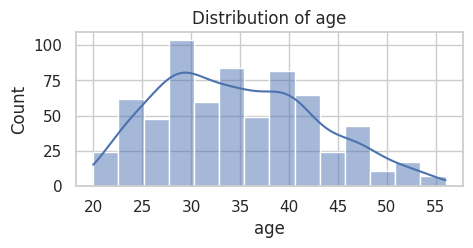

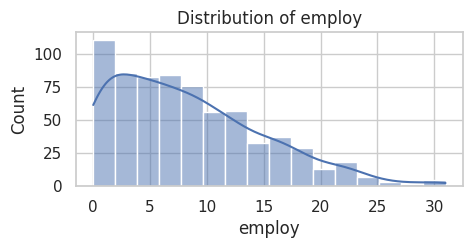

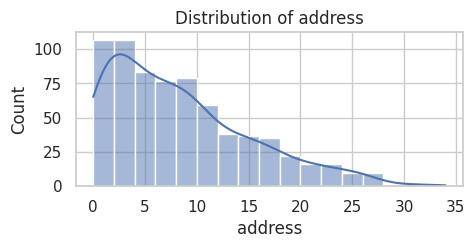

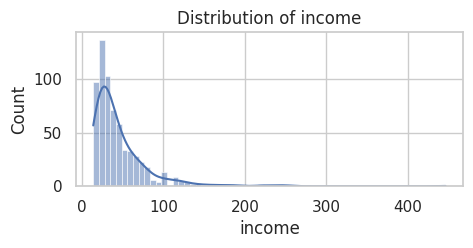

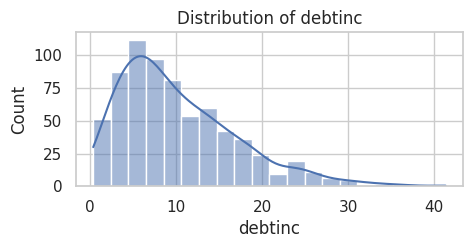

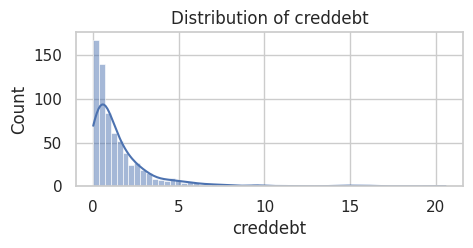

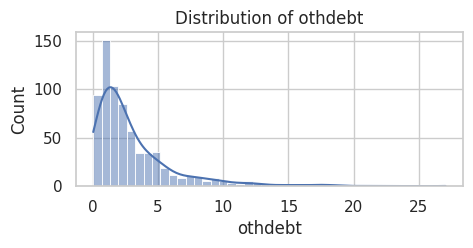

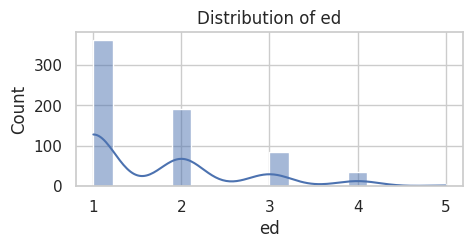


📊 Univariate Analysis - Categorical


In [ ]:
print("\n📊 Univariate Analysis - Numerical")
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

print("\n📊 Univariate Analysis - Categorical")
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

# **Bivariate Analysis (with Target)**


📈 Bivariate Analysis - Numerical vs Target


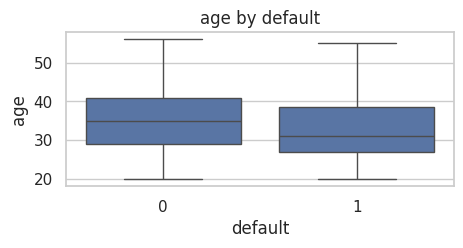

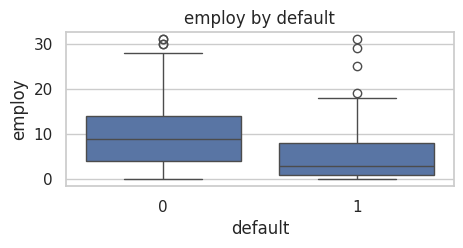

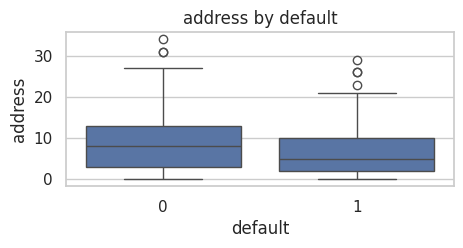

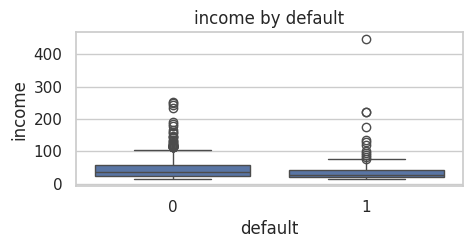

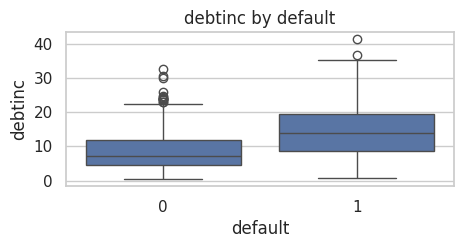

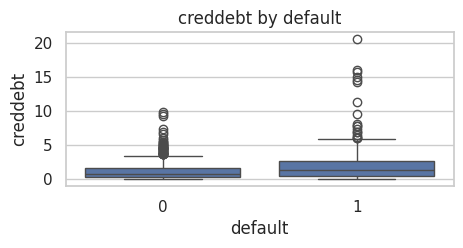

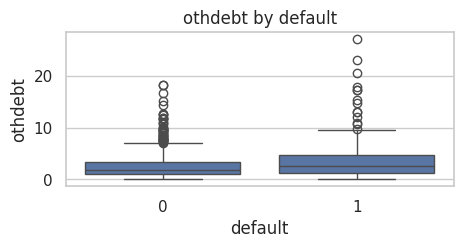

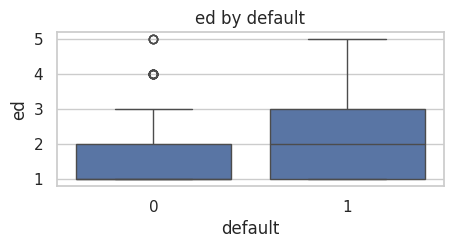


📈 Bivariate Analysis - Categorical vs Target


In [ ]:
print("\n📈 Bivariate Analysis - Numerical vs Target")
for col in numerical_cols:
    plt.figure()
    sns.boxplot(data=df, x=target, y=col)
    plt.title(f'{col} by {target}')
    plt.show()

print("\n📈 Bivariate Analysis - Categorical vs Target")
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, hue=target)
    plt.title(f'{col} by {target}')
    plt.xticks(rotation=45)
    plt.show()

# **Multivariate Analysis**


🌐 Multivariate Analysis - Correlation Heatmap


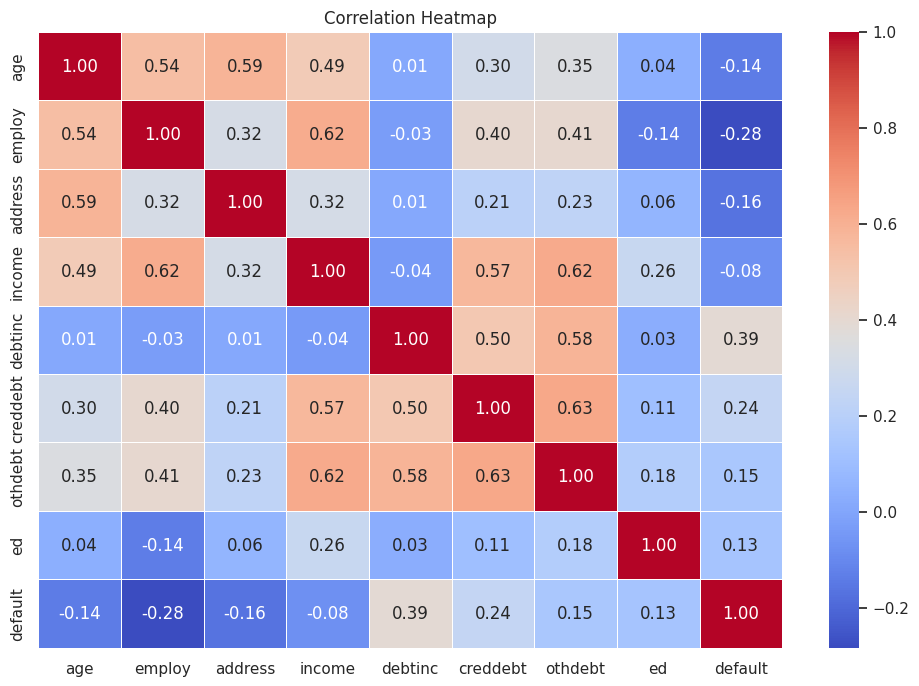

In [ ]:
print("\n🌐 Multivariate Analysis - Correlation Heatmap")
plt.figure(figsize=(12, 8))
corr = df[numerical_cols + [target]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **Preprocessing**

In [ ]:
# تحديد target تلقائيًا
for col in df.columns:
    if 'loan' in col.lower() or 'status' in col.lower() or 'default' in col.lower():
        target = col
        break
else:
    target = df.columns[-1]  # fallback: آخر عمود

# نسخة احتياطية
df_cleaned = df.copy()

# -----------------------------
# 1. معالجة القيم المفقودة
# -----------------------------
print("\n🧼 معالجة القيم المفقودة:")
for col in df_cleaned.columns:
    if df_cleaned[col].isnull().sum() > 0:
        if df_cleaned[col].dtype == 'object':
            df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])
        else:
            df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
print("✅ لا توجد قيم مفقودة الآن:", df_cleaned.isnull().sum().sum())

# -----------------------------
# 2. إزالة التكرارات
# -----------------------------
print("\n🧹 إزالة الصفوف المكررة:")
before = df_cleaned.shape[0]
df_cleaned = df_cleaned.drop_duplicates()
after = df_cleaned.shape[0]
print(f"تم حذف {before - after} صف مكرر")

# -----------------------------
# 3. ترميز الأعمدة الفئوية
# -----------------------------
from sklearn.preprocessing import LabelEncoder
cat_cols = df_cleaned.select_dtypes(include='object').columns.tolist()
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    le_dict[col] = le
print("✅ تم ترميز الأعمدة:", cat_cols)

# -----------------------------
# 4. تحويل التواريخ (إن وجدت)
# -----------------------------
date_cols = [col for col in df_cleaned.columns if 'date' in col.lower()]
for col in date_cols:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')
    df_cleaned[f'{col}_year'] = df_cleaned[col].dt.year
    df_cleaned[f'{col}_month'] = df_cleaned[col].dt.month
    df_cleaned[f'{col}_day'] = df_cleaned[col].dt.day
    df_cleaned.drop(columns=col, inplace=True)

# -----------------------------
# 5. مقياس القيم العددية
# -----------------------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()

# ⚠️ استبعاد العمود الهدف
target_col = target
if target_col in num_cols:
    num_cols.remove(target_col)

df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])
print("\n📐 تم مقياس الأعمدة العددية:", num_cols)

# -----------------------------
# 6. فصل الميزات والهدف
# -----------------------------
X = df_cleaned.drop(columns=[target_col])
y = df_cleaned[target_col]

print("\n📦 الشكل النهائي:")
print("X:", X.shape)
print("y:", y.shape)



🧼 معالجة القيم المفقودة:
✅ لا توجد قيم مفقودة الآن: 0

🧹 إزالة الصفوف المكررة:
تم حذف 0 صف مكرر
✅ تم ترميز الأعمدة: []

📐 تم مقياس الأعمدة العددية: ['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'ed']

📦 الشكل النهائي:
X: (700, 8)
y: (700,)


In [ ]:
# نسخة جديدة لتعديل outliers
df_outliers_handled = df_cleaned.copy()

# تحديد الأعمدة الرقمية (بدون العمود الهدف)
num_cols = df_outliers_handled.select_dtypes(include=np.number).columns.tolist()
if target in num_cols:
    num_cols.remove(target)

print("📊 معالجة Outliers باستخدام IQR في الأعمدة التالية:", num_cols)

# IQR method
for col in num_cols:
    Q1 = df_outliers_handled[col].quantile(0.25)
    Q3 = df_outliers_handled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # عدد القيم الشاذة قبل الإزالة
    outlier_count = df_outliers_handled[(df_outliers_handled[col] < lower) | (df_outliers_handled[col] > upper)].shape[0]

    # إزالة القيم الشاذة
    df_outliers_handled = df_outliers_handled[(df_outliers_handled[col] >= lower) & (df_outliers_handled[col] <= upper)]

    print(f"🧹 {col}: تم إزالة {outlier_count} outliers")

print("\n✅ الشكل بعد إزالة Outliers:", df_outliers_handled.shape)


📊 معالجة Outliers باستخدام IQR في الأعمدة التالية: ['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'ed']
🧹 age: تم إزالة 0 outliers
🧹 employ: تم إزالة 10 outliers
🧹 address: تم إزالة 14 outliers
🧹 income: تم إزالة 39 outliers
🧹 debtinc: تم إزالة 13 outliers
🧹 creddebt: تم إزالة 43 outliers
🧹 othdebt: تم إزالة 35 outliers
🧹 ed: تم إزالة 30 outliers

✅ الشكل بعد إزالة Outliers: (516, 9)



📈 Bivariate Analysis (After Cleaning) - Numerical vs Target


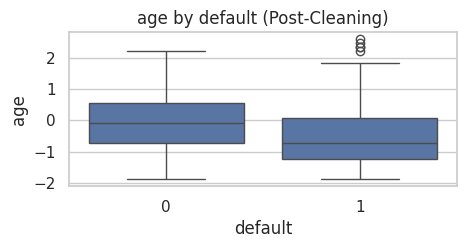

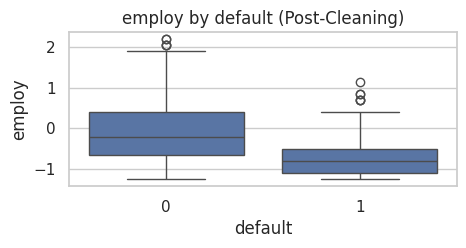

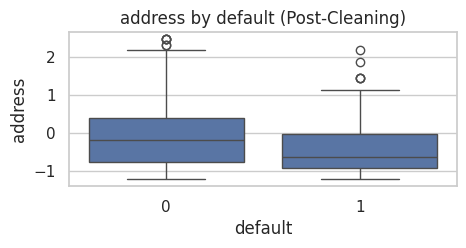

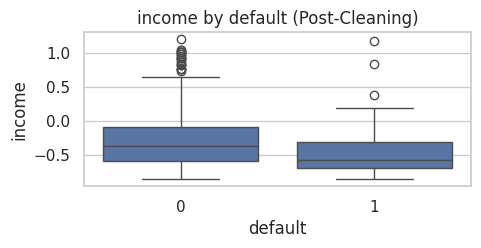

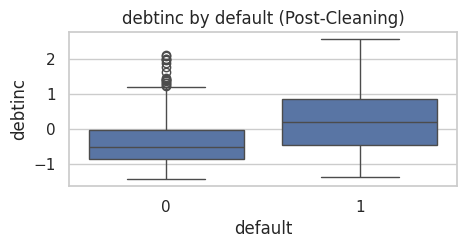

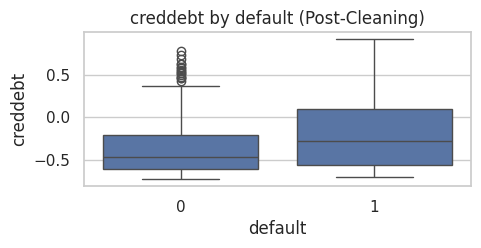

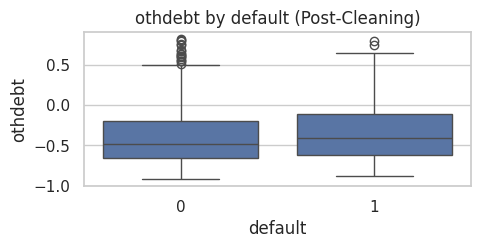

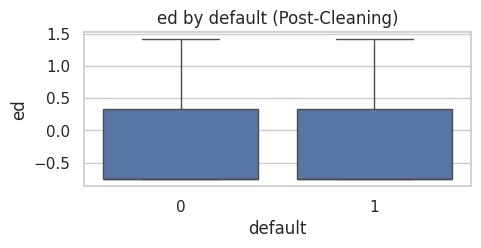


📈 Bivariate Analysis (After Cleaning) - Categorical vs Target


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# إعادة تعريف الأعمدة بعد المعالجة
numerical_cols = df_outliers_handled.select_dtypes(include='number').columns.tolist()
categorical_cols = df_outliers_handled.select_dtypes(exclude='number').columns.tolist()

# التأكد من عدم وجود العمود الهدف في numerical
if target in numerical_cols:
    numerical_cols.remove(target)
if target in categorical_cols:
    categorical_cols.remove(target)

# -----------------------------
# 1. Bivariate Analysis - Numerical vs Target
# -----------------------------
print("\n📈 Bivariate Analysis (After Cleaning) - Numerical vs Target")
for col in numerical_cols:
    plt.figure()
    sns.boxplot(data=df_outliers_handled, x=target, y=col)
    plt.title(f'{col} by {target} (Post-Cleaning)')
    plt.show()

# -----------------------------
# 2. Bivariate Analysis - Categorical vs Target
# -----------------------------
print("\n📈 Bivariate Analysis (After Cleaning) - Categorical vs Target")
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df_outliers_handled, x=col, hue=target)
    plt.title(f'{col} by {target} (Post-Cleaning)')
    plt.xticks(rotation=45)
    plt.show()
